In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from collections import OrderedDict

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

## T1 PvL

In [2]:
data_time1 = pd.read_csv('RF_time1.tsv',sep='\t', index_col = 0)
#data = data.T
data_time1

,Ruminococcaceae_denovo10000,Clostridiales_denovo100731,Clostridiales_denovo137602,Ruminococcaceae_denovo137967,RF39_denovo147868,Clostridiales_denovo152861,Clostridiales_denovo153245,Clostridiales_denovo167428,Clostridiales_denovo167887,Lachnospiraceae_denovo174953,...,RF39_denovo556210,Bifidobacteriaceae_denovo55677,Clostridiales_denovo65513,Enterobacteriaceae_denovo72427,Deferribacteraceae_denovo76908,Lachnospiraceae_denovo78453,Lactobacillaceae_denovo78833,Ruminococcaceae_denovo82126,Treat,Time
OTU_ID,,,,,,,,,,,,,,,,,,,,,
C01P1A,0,2,1,0,0,2,3,0,1,0,...,8,1,2,0,106,2,35,7,P,1
C02P1A,0,2,0,0,1,1,0,0,3,0,...,3,4,0,0,31,0,31,0,P,1
C03P1B,25,6,1,0,0,3,0,1,40,2,...,54,1,0,1,3175,0,86,0,P,1
C04P1B,2,0,0,1,0,0,0,0,1,0,...,0,1,0,0,28,0,225,1,P,1
C05P1C,6,1,0,1,0,3,0,0,43,1,...,2,1,0,0,60,0,75,6,P,1
C06P1C,0,2,0,0,0,3,0,0,0,0,...,1,5,0,1,33,0,30,0,P,1
C07P1D,1,1,3,6,0,5,0,0,0,0,...,24,64,0,1,92,0,1563,4,P,1
C08P1D,2,2,1,0,0,2,2,0,0,0,...,2,24,1,1,2029,0,470,1,P,1
C09P1E,0,4,0,0,0,2,0,0,0,0,...,117,4,1,0,34,0,307,1,P,1


In [3]:
data_time1.iloc[:,0:57]

,Ruminococcaceae_denovo10000,Clostridiales_denovo100731,Clostridiales_denovo137602,Ruminococcaceae_denovo137967,RF39_denovo147868,Clostridiales_denovo152861,Clostridiales_denovo153245,Clostridiales_denovo167428,Clostridiales_denovo167887,Lachnospiraceae_denovo174953,...,Lactobacillaceae_denovo489518,RF39_denovo494541,RF39_denovo556210,Bifidobacteriaceae_denovo55677,Clostridiales_denovo65513,Enterobacteriaceae_denovo72427,Deferribacteraceae_denovo76908,Lachnospiraceae_denovo78453,Lactobacillaceae_denovo78833,Ruminococcaceae_denovo82126
OTU_ID,,,,,,,,,,,,,,,,,,,,,
C01P1A,0,2,1,0,0,2,3,0,1,0,...,0,15,8,1,2,0,106,2,35,7
C02P1A,0,2,0,0,1,1,0,0,3,0,...,0,14,3,4,0,0,31,0,31,0
C03P1B,25,6,1,0,0,3,0,1,40,2,...,0,270,54,1,0,1,3175,0,86,0
C04P1B,2,0,0,1,0,0,0,0,1,0,...,0,29,0,1,0,0,28,0,225,1
C05P1C,6,1,0,1,0,3,0,0,43,1,...,1,1,2,1,0,0,60,0,75,6
C06P1C,0,2,0,0,0,3,0,0,0,0,...,0,1,1,5,0,1,33,0,30,0
C07P1D,1,1,3,6,0,5,0,0,0,0,...,1,2,24,64,0,1,92,0,1563,4
C08P1D,2,2,1,0,0,2,2,0,0,0,...,0,1,2,24,1,1,2029,0,470,1
C09P1E,0,4,0,0,0,2,0,0,0,0,...,2,3,117,4,1,0,34,0,307,1


In [4]:
# Split the Groups from the dataset where y is category and x is data with species
y = data_time1.iloc[:,57]
x = data_time1.iloc[:,0:57]

In [5]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

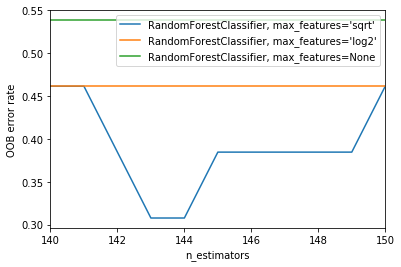

In [6]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 140
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [7]:
clf = RandomForestClassifier(n_estimators=144, max_features='sqrt', random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.5833333333333333


In [8]:
clf_final = RandomForestClassifier(n_estimators=144, bootstrap=True,max_features='sqrt',oob_score= True,
                                   random_state= 42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.8571428571428571


In [9]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.9166666666666667

In [10]:
print(clf_final.oob_score_)

0.6923076923076923


In [11]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(10)

29    0.105586
18    0.075800
12    0.058766
50    0.056853
1     0.037866
11    0.034264
46    0.031597
16    0.031172
23    0.027662
22    0.026000
dtype: float64

In [12]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data_time1.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(10)

,Gini-importance
Clostridiales_denovo298519,0.105586
Ruminococcaceae_denovo217968,0.075800
Ruminococcaceae_denovo179087,0.058766
Bifidobacteriaceae_denovo55677,0.056853
Clostridiales_denovo100731,0.037866
Bacteroidaceae_denovo177937,0.034264
Clostridiales_denovo484653,0.031597
Lactobacillaceae_denovo205876,0.031172
Desulfovibrionaceae_denovo260927,0.027662
Erysipelotrichaceae_denovo253134,0.026000


In [13]:
imp.head(10).to_csv("RF_plot_time1.csv")

## T2 PvL

In [14]:
data_time2 = pd.read_csv('RF_time2.tsv',sep='\t', index_col = 0)
#data = data.T
data_time2

,Ruminococcaceae_denovo10000,Clostridiales_denovo100731,Clostridiales_denovo137602,Ruminococcaceae_denovo137967,RF39_denovo147868,Clostridiales_denovo152861,Clostridiales_denovo153245,Clostridiales_denovo167428,Clostridiales_denovo167887,Lachnospiraceae_denovo174953,...,RF39_denovo556210,Bifidobacteriaceae_denovo55677,Clostridiales_denovo65513,Enterobacteriaceae_denovo72427,Deferribacteraceae_denovo76908,Lachnospiraceae_denovo78453,Lactobacillaceae_denovo78833,Ruminococcaceae_denovo82126,Treat,Time
OTU_ID,,,,,,,,,,,,,,,,,,,,,
E01P2A,1,1,0,0,1,0,0,0,0,0,...,1,8,0,0,113,2,274,2,P,2
E02P2A,0,1,0,1,0,2,0,0,0,0,...,285,2,0,1,60,0,417,3,P,2
E03P2B,9,1,1,0,0,1,0,0,38,0,...,1,1,0,1,63,0,378,1,P,2
E04P2B,8,47,1,58,0,0,0,1,10,1,...,25,2,1,2,46,0,2482,1,P,2
E05P2C,1,26,1,0,0,2,0,1,89,1,...,4,4,0,4,1582,0,38,3,P,2
E06P2C,0,2,0,1,0,1,1,0,1,0,...,4,0,0,0,58,0,59,3,P,2
E07P2D,0,3,0,9,3,4,1,1,0,2,...,5,8,1,1,194,0,142,2,P,2
E08P2D,0,0,2,0,0,1,0,0,0,0,...,6,5,0,5,26,3,1176,1,P,2
E09P2E,10,65,1,0,0,2,0,0,1,0,...,1,0,1,1,131,0,152,9,P,2


In [15]:
data_time2.iloc[:,57]

OTU_ID
E01P2A    P
E02P2A    P
E03P2B    P
E04P2B    P
E05P2C    P
E06P2C    P
E07P2D    P
E08P2D    P
E09P2E    P
E10P2E    P
F01L2F    L
F02L2F    L
F03L2G    L
F04L2G    L
F05L2H    L
F06L2H    L
F07L2I    L
F08L2I    L
F09L2J    L
F10L2J    L
Name: Treat, dtype: object

In [16]:
# Split the Groups from the dataset where y is category and x is data with species
y = data_time2.iloc[:,57]
x = data_time2.iloc[:,0:57]

In [17]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

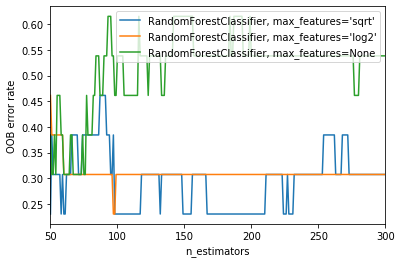

In [18]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 50
max_estimators = 300

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [19]:
clf = RandomForestClassifier(n_estimators=150, max_features='sqrt', random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.65


In [20]:
clf_final = RandomForestClassifier(n_estimators=150, bootstrap=True,max_features='sqrt',oob_score= True,
                                   random_state= 42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.8571428571428571


In [21]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.9166666666666667

In [22]:
print(clf_final.oob_score_)

0.7692307692307693


In [23]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

50    0.092083
31    0.087085
1     0.072609
19    0.064060
32    0.055384
2     0.055019
39    0.042939
15    0.038401
23    0.037731
33    0.027278
14    0.025420
29    0.023689
52    0.021917
10    0.021205
22    0.020942
12    0.020889
25    0.020715
54    0.017143
41    0.015959
18    0.015692
dtype: float64

In [24]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data_time1.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
Bifidobacteriaceae_denovo55677,0.092083
Clostridiales_denovo309433,0.087085
Clostridiales_denovo100731,0.072609
Lachnospiraceae_denovo227121,0.064060
Clostridiales_denovo321304,0.055384
Clostridiales_denovo137602,0.055019
Lachnospiraceae_denovo386274,0.042939
Clostridiales_denovo18922,0.038401
Desulfovibrionaceae_denovo260927,0.037731
Clostridiales_denovo333253,0.027278


In [25]:
imp.head(10).to_csv("RF_plot_time2.csv")

## T3 PvL

In [26]:
data_time3 = pd.read_csv('RF_time3.tsv',sep='\t', index_col = 0)
#data = data.T
data_time3

,Ruminococcaceae_denovo10000,Clostridiales_denovo100731,Clostridiales_denovo137602,Ruminococcaceae_denovo137967,RF39_denovo147868,Clostridiales_denovo152861,Clostridiales_denovo153245,Clostridiales_denovo167428,Clostridiales_denovo167887,Lachnospiraceae_denovo174953,...,RF39_denovo556210,Bifidobacteriaceae_denovo55677,Clostridiales_denovo65513,Enterobacteriaceae_denovo72427,Deferribacteraceae_denovo76908,Lachnospiraceae_denovo78453,Lactobacillaceae_denovo78833,Ruminococcaceae_denovo82126,Treat,Time
OTU_ID,,,,,,,,,,,,,,,,,,,,,
G01P3A,0,1,0,0,1,1,0,0,1,0,...,91,4,2,1,1197,8,311,1,P,3
G02P3A,1,9,0,1,0,11,0,1,1,5,...,146,92,1,1,4019,0,264,4,P,3
G03P3B,1,12,0,10,0,0,0,0,0,1,...,10,1,1,2,185,0,4109,0,P,3
G04P3B,3,60,1,32,0,0,0,1,45,3,...,12,1,0,0,84,0,2627,7,P,3
G05P3C,1,9,0,0,0,8,0,2,18,1,...,3,262,0,8,249,0,93,1,P,3
G06P3C,0,2,0,0,0,0,0,0,2,1,...,3,73,1,3,43,0,42,0,P,3
G07P3D,1,2,2,4,2,2,1,3,0,2,...,25,658,0,6,426,0,13484,2,P,3
G08P3D,1,8,1,31,2,71,0,0,1,1,...,28,106,1,1,3038,17,1723,3,P,3
G09P3E,0,69,0,0,0,2,0,0,0,2,...,345,1,1,2,2236,0,928,2,P,3


In [27]:
data_time3.iloc[:,57]

OTU_ID
G01P3A    P
G02P3A    P
G03P3B    P
G04P3B    P
G05P3C    P
G06P3C    P
G07P3D    P
G08P3D    P
G09P3E    P
G10P3E    P
H01L3F    L
H02L3F    L
H03L3G    L
H04L3G    L
H05L3H    L
H06L3H    L
H07L3I    L
H08L3I    L
H09L3J    L
H10L3J    L
Name: Treat, dtype: object

In [28]:
# Split the Groups from the dataset where y is category and x is data with species
y = data_time3.iloc[:,57]
x = data_time3.iloc[:,0:57]

In [29]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

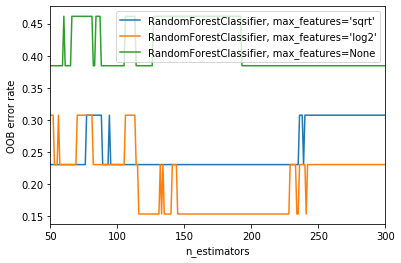

In [30]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 50
max_estimators = 300

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [31]:
clf = RandomForestClassifier(n_estimators=150, max_features='log2', random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.7333333333333333


In [32]:
clf_final = RandomForestClassifier(n_estimators=150, bootstrap=True,max_features='log2',oob_score= True,
                                   random_state= 42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.5714285714285714


In [33]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.8333333333333334

In [34]:
print(clf_final.oob_score_)

0.8461538461538461


In [35]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

15    0.065085
52    0.062930
44    0.050961
23    0.043367
40    0.041620
55    0.040742
39    0.040323
1     0.038939
46    0.035823
29    0.033021
22    0.030081
25    0.028984
32    0.028974
12    0.027631
16    0.024799
48    0.024567
50    0.024262
34    0.023560
5     0.021804
36    0.020746
dtype: float64

In [36]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data_time1.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
Clostridiales_denovo18922,0.065085
Enterobacteriaceae_denovo72427,0.062930
Lactobacillaceae_denovo470643,0.050961
Desulfovibrionaceae_denovo260927,0.043367
Lactobacillaceae_denovo392914,0.041620
Lactobacillaceae_denovo78833,0.040742
Lachnospiraceae_denovo386274,0.040323
Clostridiales_denovo100731,0.038939
Clostridiales_denovo484653,0.035823
Clostridiales_denovo298519,0.033021


In [37]:
imp.head(10).to_csv("RF_plot_time3.csv")

## T4 PvL

In [38]:
data_time4 = pd.read_csv('RF_time4.tsv',sep='\t', index_col = 0)
#data = data.T
data_time4

,Ruminococcaceae_denovo10000,Clostridiales_denovo100731,Clostridiales_denovo137602,Ruminococcaceae_denovo137967,RF39_denovo147868,Clostridiales_denovo152861,Clostridiales_denovo153245,Clostridiales_denovo167428,Clostridiales_denovo167887,Lachnospiraceae_denovo174953,...,RF39_denovo556210,Bifidobacteriaceae_denovo55677,Clostridiales_denovo65513,Enterobacteriaceae_denovo72427,Deferribacteraceae_denovo76908,Lachnospiraceae_denovo78453,Lactobacillaceae_denovo78833,Ruminococcaceae_denovo82126,Treat,Time
OTU_ID,,,,,,,,,,,,,,,,,,,,,
A01P4A,1,1,0,0,15,0,0,0,0,0,...,5,15,1,0,2967,1,135,5,P,4
A02P4A,0,4,0,1,0,17,0,7,0,4,...,9,4,0,1,1148,11,65,0,P,4
A03P4B,1,21,1,12,0,1,0,1,8,1,...,3,23,0,2,60,0,1126,0,P,4
A05P4C,1,41,0,1,0,5,1,6,87,0,...,4,433,0,1,197,1,28,9,P,4
A06P4C,0,1,0,0,0,0,1,0,0,0,...,2,1671,0,2,65,0,174,2,P,4
A07P4D,1,3,0,5,0,2,4,0,1,1,...,3,0,0,0,1111,3,201,44,P,4
A08P4D,0,6,1,11,23,25,0,0,1,3,...,5,1,0,0,664,19,376,0,P,4
A09P4E,1,79,0,3,0,1,0,1,0,0,...,214,5,0,2,15104,0,149,10,P,4
A10P4E,0,24,0,0,0,1,0,0,1,0,...,3,7,0,0,729,7,310,14,P,4


In [39]:
data_time4.iloc[:,0:57]

,Ruminococcaceae_denovo10000,Clostridiales_denovo100731,Clostridiales_denovo137602,Ruminococcaceae_denovo137967,RF39_denovo147868,Clostridiales_denovo152861,Clostridiales_denovo153245,Clostridiales_denovo167428,Clostridiales_denovo167887,Lachnospiraceae_denovo174953,...,Lactobacillaceae_denovo489518,RF39_denovo494541,RF39_denovo556210,Bifidobacteriaceae_denovo55677,Clostridiales_denovo65513,Enterobacteriaceae_denovo72427,Deferribacteraceae_denovo76908,Lachnospiraceae_denovo78453,Lactobacillaceae_denovo78833,Ruminococcaceae_denovo82126
OTU_ID,,,,,,,,,,,,,,,,,,,,,
A01P4A,1,1,0,0,15,0,0,0,0,0,...,0,0,5,15,1,0,2967,1,135,5
A02P4A,0,4,0,1,0,17,0,7,0,4,...,0,2,9,4,0,1,1148,11,65,0
A03P4B,1,21,1,12,0,1,0,1,8,1,...,1,5,3,23,0,2,60,0,1126,0
A05P4C,1,41,0,1,0,5,1,6,87,0,...,0,24,4,433,0,1,197,1,28,9
A06P4C,0,1,0,0,0,0,1,0,0,0,...,0,0,2,1671,0,2,65,0,174,2
A07P4D,1,3,0,5,0,2,4,0,1,1,...,0,39,3,0,0,0,1111,3,201,44
A08P4D,0,6,1,11,23,25,0,0,1,3,...,0,0,5,1,0,0,664,19,376,0
A09P4E,1,79,0,3,0,1,0,1,0,0,...,0,3,214,5,0,2,15104,0,149,10
A10P4E,0,24,0,0,0,1,0,0,1,0,...,0,0,3,7,0,0,729,7,310,14


In [40]:
# Split the Groups from the dataset where y is category and x is data with species
y = data_time4.iloc[:,57]
x = data_time4.iloc[:,0:57]

In [41]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

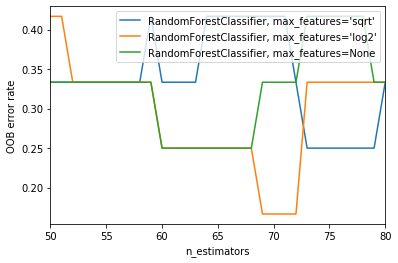

In [42]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 50
max_estimators = 80

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [43]:
clf = RandomForestClassifier(n_estimators=70, max_features='log2', random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

/home/basilin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Mean Validation Scores: 0.7


In [44]:
clf_final = RandomForestClassifier(n_estimators=70, bootstrap=True,max_features='log2',oob_score= True,
                                   random_state= 42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.7142857142857143


In [45]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.6

In [46]:
print(clf_final.oob_score_)

0.8333333333333334


In [47]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

46    0.105442
0     0.093605
30    0.061104
12    0.059942
48    0.050082
1     0.046871
15    0.043862
25    0.033537
41    0.032560
23    0.030087
37    0.027273
56    0.023386
31    0.022653
16    0.020204
51    0.019728
55    0.017588
42    0.017449
50    0.015918
24    0.015661
14    0.015555
dtype: float64

In [48]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data_time1.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
Clostridiales_denovo484653,0.105442
Ruminococcaceae_denovo10000,0.093605
Ruminococcaceae_denovo303151,0.061104
Ruminococcaceae_denovo179087,0.059942
RF39_denovo494541,0.050082
Clostridiales_denovo100731,0.046871
Clostridiales_denovo18922,0.043862
Lachnospiraceae_denovo276673,0.033537
S24-7_denovo421967,0.032560
Desulfovibrionaceae_denovo260927,0.030087


In [49]:
imp.head(10).to_csv("RF_plot_time4.csv")

## T5 PvL

In [50]:
data_time5 = pd.read_csv('RF_time5.tsv',sep='\t', index_col = 0)
#data = data.T
data_time5

,Ruminococcaceae_denovo10000,Clostridiales_denovo100731,Clostridiales_denovo137602,Ruminococcaceae_denovo137967,RF39_denovo147868,Clostridiales_denovo152861,Clostridiales_denovo153245,Clostridiales_denovo167428,Clostridiales_denovo167887,Lachnospiraceae_denovo174953,...,RF39_denovo556210,Bifidobacteriaceae_denovo55677,Clostridiales_denovo65513,Enterobacteriaceae_denovo72427,Deferribacteraceae_denovo76908,Lachnospiraceae_denovo78453,Lactobacillaceae_denovo78833,Ruminococcaceae_denovo82126,Treat,Time
OTU_ID,,,,,,,,,,,,,,,,,,,,,
C01P5A,1,7,1,0,4,1,1,0,2,0,...,8,27,1,0,105,1,1185,0,P,5
C02P5A,0,2,6,0,1,48,1,1,1,0,...,34,36,0,0,60,4,786,0,P,5
C03P5B,7,3,17,112,0,1,0,1,250,0,...,5,75,0,0,881,0,339,23,P,5
C04P5B,3,71,3,12,0,0,0,13,7,0,...,5,79,1,1,58,0,1480,3,P,5
C05P5C,1,49,0,0,0,4,1,10,81,1,...,3,1102,0,0,214,0,44,3,P,5
C06P5C,0,0,0,0,0,0,0,0,0,1,...,1,100,0,0,210,1,30,1,P,5
C07P5D,1,8,1,12,0,30,14,1,0,7,...,21,13,0,0,1794,1,56,2,P,5
C08P5D,0,61,0,5,80,7,3,0,2,3,...,2,11,0,0,4288,9,47,9,P,5
C09P5E,1,124,1,58,0,3,0,0,1,1,...,27,2,1,0,6281,1,278,14,P,5


In [51]:
data_time5.iloc[:,0:57]

,Ruminococcaceae_denovo10000,Clostridiales_denovo100731,Clostridiales_denovo137602,Ruminococcaceae_denovo137967,RF39_denovo147868,Clostridiales_denovo152861,Clostridiales_denovo153245,Clostridiales_denovo167428,Clostridiales_denovo167887,Lachnospiraceae_denovo174953,...,Lactobacillaceae_denovo489518,RF39_denovo494541,RF39_denovo556210,Bifidobacteriaceae_denovo55677,Clostridiales_denovo65513,Enterobacteriaceae_denovo72427,Deferribacteraceae_denovo76908,Lachnospiraceae_denovo78453,Lactobacillaceae_denovo78833,Ruminococcaceae_denovo82126
OTU_ID,,,,,,,,,,,,,,,,,,,,,
C01P5A,1,7,1,0,4,1,1,0,2,0,...,0,17,8,27,1,0,105,1,1185,0
C02P5A,0,2,6,0,1,48,1,1,1,0,...,0,0,34,36,0,0,60,4,786,0
C03P5B,7,3,17,112,0,1,0,1,250,0,...,0,50,5,75,0,0,881,0,339,23
C04P5B,3,71,3,12,0,0,0,13,7,0,...,2,1,5,79,1,1,58,0,1480,3
C05P5C,1,49,0,0,0,4,1,10,81,1,...,0,44,3,1102,0,0,214,0,44,3
C06P5C,0,0,0,0,0,0,0,0,0,1,...,0,0,1,100,0,0,210,1,30,1
C07P5D,1,8,1,12,0,30,14,1,0,7,...,0,67,21,13,0,0,1794,1,56,2
C08P5D,0,61,0,5,80,7,3,0,2,3,...,0,268,2,11,0,0,4288,9,47,9
C09P5E,1,124,1,58,0,3,0,0,1,1,...,0,121,27,2,1,0,6281,1,278,14


In [52]:
# Split the Groups from the dataset where y is category and x is data with species
y = data_time5.iloc[:,57]
x = data_time5.iloc[:,0:57]

In [53]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

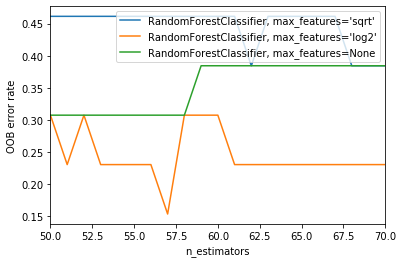

In [54]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 50
max_estimators = 70

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [55]:
clf = RandomForestClassifier(n_estimators=56, max_features='log2', random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.8333333333333333


In [56]:
clf_final = RandomForestClassifier(n_estimators=56, bootstrap=True,max_features='log2',oob_score= True,
                                   random_state= 42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.5714285714285714


In [57]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

1.0

In [58]:
print(clf_final.oob_score_)

0.7692307692307693


In [59]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

23    0.103280
17    0.081220
28    0.071370
48    0.062375
51    0.051740
3     0.044228
46    0.043360
55    0.041781
41    0.041626
31    0.035349
26    0.032586
39    0.032585
2     0.023851
38    0.019970
45    0.018860
37    0.017857
34    0.016563
50    0.015992
24    0.015292
0     0.014897
dtype: float64

In [60]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data_time1.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
Desulfovibrionaceae_denovo260927,0.103280
Erysipelotrichaceae_denovo211707,0.081220
Clostridiales_denovo289427,0.071370
RF39_denovo494541,0.062375
Clostridiales_denovo65513,0.051740
Ruminococcaceae_denovo137967,0.044228
Clostridiales_denovo484653,0.043360
Lactobacillaceae_denovo78833,0.041781
S24-7_denovo421967,0.041626
Clostridiales_denovo309433,0.035349


In [61]:
imp.head(10).to_csv("RF_plot_time5.csv")